In [1]:
import numpy as np
import pandas as pd

In [4]:
#线性回归
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


d:\soft\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


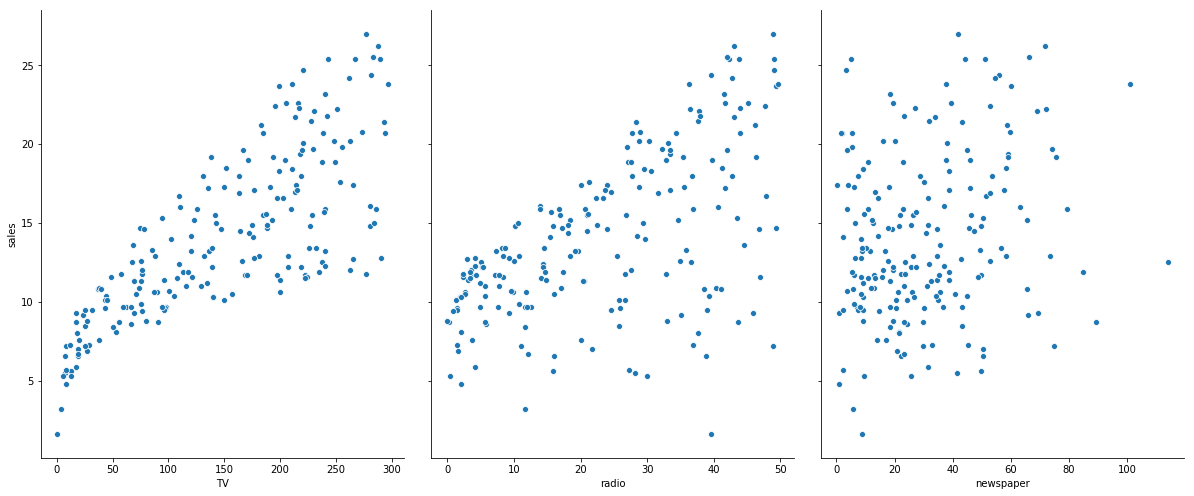

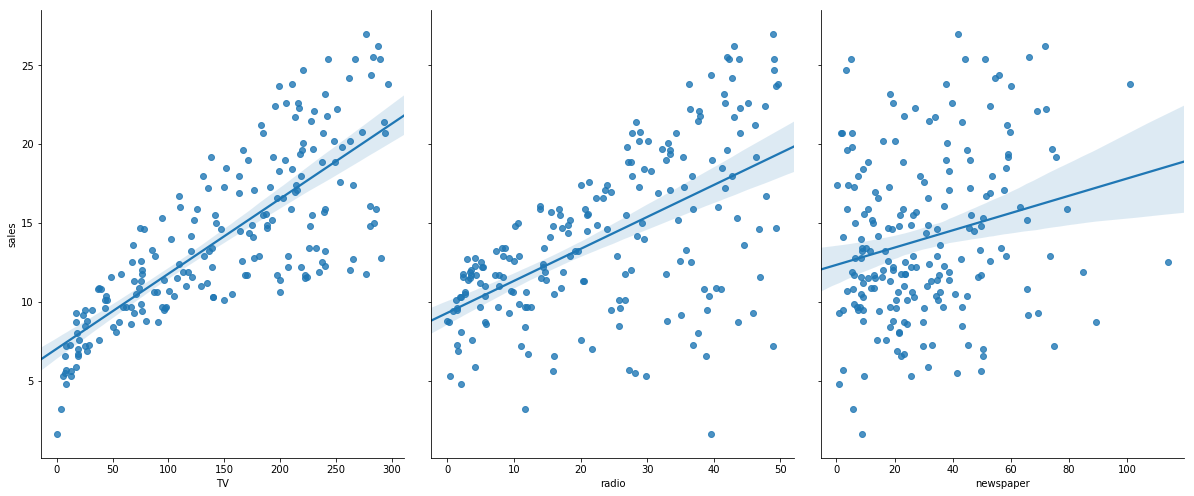

In [11]:
#画散点图
import seaborn as sns
import matplotlib
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'],y_vars='sales',size=7,aspect=0.8)
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'],y_vars='sales',size=7,aspect=0.8,kind='reg')

In [13]:
#计算相关系数矩阵
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [24]:
#构建X Y数据集
X = data[['TV', 'radio', 'newspaper']]
X.head()
y = data['sales']
y.head()
##直接根据最小二乘法求解，因为此时是多元线性回归，可以用矩阵运算
def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print('this matrix is singular, cannot do inverse')
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws
##求解回归方程系数
X2 = X
X2['intercept'] = [1] * 200
standRegres(X2,y)

matrix([[ 4.57646455e-02],
        [ 1.88530017e-01],
        [-1.03749304e-03],
        [ 2.93888937e+00]])

In [30]:
##也可以利用现有的库求解线性回归的系数
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)
print(linreg.intercept_)
print(linreg.coef_)
for i in zip(['TV', 'radio', 'newspaper'], linreg.coef_):
    print(i)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749  0.        ]
('TV', 0.0457646454553976)
('radio', 0.18853001691820442)
('newspaper', -0.0010374930424763007)


In [35]:
##测试机和训练集的构建
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
#结果
print(linreg.intercept_)
print(linreg.coef_)
for i in zip(['TV', 'radio', 'newspaper'], linreg.coef_):
    print(i)
##预测
y_pred = linreg.predict(X_test)
#误差评估
from sklearn import metrics
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
# calculate MSE using scikit-learn
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
# calculate RMSE using scikit-learn
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2.87696662231793
[0.04656457 0.17915812 0.00345046 0.        ]
('TV', 0.04656456787415029)
('radio', 0.1791581224508884)
('newspaper', 0.0034504647111804343)
MAE: 1.0668917082595213
MSE: 1.9730456202283375
RMSE: 1.4046514230328953


In [37]:
##模型比较,剔除相关性弱的nespaper重新训练
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
# calculate MSE using scikit-learn
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
# calculate RMSE using scikit-learn
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.04775904112126
MSE: 1.9262760418667424
RMSE: 1.3879034699382888
